# Create an image of the section (for classification using computer vision techniques)

In [7]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

## Load mesh / Triangulation

In [8]:
V = np.loadtxt("d:/tess_v_0.txt", dtype=np.float32)
T = np.loadtxt("d:/tess_t_0.txt", dtype=np.int32)

In [9]:
tri = matplotlib.tri.Triangulation(V[:,0], V[:,1], triangles=T)

## Make a figure, save as png

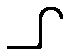

In [120]:
DPI = 300
FIGSIZE = (1,1)

fig, ax = plt.subplots(figsize=FIGSIZE)

ax.tricontourf(tri, [0]*len(V), colors='k')
ax.set_axis_off()
ax.set_aspect("equal")

In [121]:
# (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

# this gives a 300x300 image -> very compact, about 1.5 kB
fig.savefig("d:/j.png", dpi=DPI)

## Load as Image

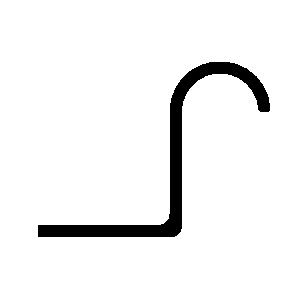

In [130]:
im = Image.open("d:/j.png", )
im

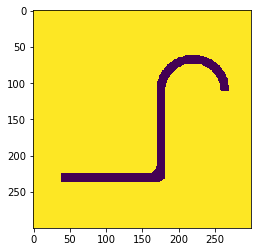

In [143]:
# get an array out of that?
arr = np.array(im)
plt.imshow(arr[:,:,0])

In [146]:
# not so great. uses 89 kB
# np.save("d:/j.npy", arr[:,:,0])

## Can we get the array directly from Matplotlib?

- works in principle. could use this to save simple image as npy array (only 1 color channel)
- FIXME: need to figure out how to set the resolution

In [107]:
def fig2data(fig):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # adapted from http://www.icare.univ-lille1.fr/tutorials/convert_a_matplotlib_figure
    
    # draw the renderer
    fig.canvas.draw()
 
    # Get the RGB buffer from the figure
    w, h = fig.canvas.get_width_height()
    buf = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    buf.shape = (w, h, 3)
 
    # just need one color channel
    return buf[:,:,0]

(72, 72)


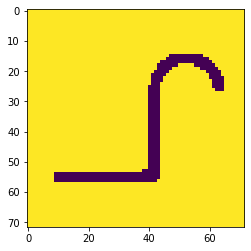

In [147]:
arr = fig2data(fig)
print(arr.shape)
plt.imshow(arr)